# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [6]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**
For posterioir we have:
\begin{align}
p(\mu, \tau) 
&= \frac{\sqrt{\beta\tau}}{\sqrt{2\pi}}\exp\left(-\frac{\beta\tau}{2}(\mu - \mu_0)^2\right)\frac{b^a\tau^{a - 1}e^{-b\tau}}{\Gamma(a)}\\
&= \frac{b^a\sqrt{\beta}}{\Gamma(a)\sqrt{2\pi}} \tau^{a - \frac{1}{2}}e^{-b\tau}\exp\left(-\frac{\beta\tau}{2}(\mu - \mu_0)^2\right)\\
&= {\rm NornalGamma}(\mu_0, \beta, a, b)
\end{align}

\begin{equation}
    p(\mu, \tau| X) \sim p(X|\mu, \tau)p(\mu, \tau)
\end{equation}

$X = (x_1, \dots, x_n)$ iid then $p(X|\mu, \tau) = \prod\limits_{i = 1}^n\mathcal{N}(x; \mu, \tau^{-1})$.


\begin{align}
p(\mu, \tau| X) = \frac{\tau^{n/2}}{2^{n/2}}\exp\left(-\frac{\tau}{2}\sum\limits_{i = 1}^n(x_i - \mu)^2\right)
\end{align}

\begin{align}
p(\mu, \tau| X) 
&\sim \frac{\tau^{n/2}}{2^{n/2}}\exp\left(-\frac{\tau}{2}\sum\limits_{i = 1}^n(x_i - \mu)^2\right)\frac{(\beta\tau)^{1/2}}{\sqrt{2}}\exp\left(-\frac{\beta\tau}{2}(\mu - \mu_0)^2\right)\frac{b^a\tau^{a - 1}\exp(-b\tau)}{\Gamma(a)}\\
&\sim \tau^{\frac{n}{2} + a - \frac{1}{2}}\exp\left[-\tau\left(\frac{1}{2}\sum\limits_{i = 1}^n(x_i - \mu)^2 + \frac{\beta}{2}(\mu - \mu_0)^2 + b\right)\right]\\
&\sim \tau^{\frac{n}{2} + a - \frac{1}{2}}\exp\left[-\tau\left(\frac{1}{2}\sum\limits_{i = 1}^2(x_i^2 - 2x_i\mu + \mu^2) +\frac{\beta}{2}(\mu^2 - 2\mu\mu_0 + \mu_0^2) + b\right)\right]
\end{align}

Let's $\bar{x} = \frac{1}{n}\sum\limits_{i = 1}^nx_i$

\begin{align}
p(\mu, \tau| X) 
&\sim
\tau^{\frac{n}{2} + a - \frac{1}{2}}
\exp\left[-\tau\left(\frac{1}{2}\sum\limits_{i = 1}^nx_i^2 - n\bar{x}\mu + \frac{n}{2}\mu^2 + \frac{\beta}{2}(\mu^2 - 2\mu\mu_0 + \mu_0^2) + b\right)\right]\\
&\sim
\tau^{\frac{n}{2} + a - \frac{1}{2}}
\exp\left[-\tau\left(\frac{1}{2}\sum\limits_{i = 1}^nx_i^2 + \frac{1}{2}\left((n + \beta)\mu^2 - 2\mu\frac{(n\bar{x} + \mu_0\beta)(n + \beta)}{n + \beta} \pm \frac{(n\bar{x} + \mu_0\beta)^2(n + \beta)}{(n + \beta)^2}\right) + \frac{\mu_0^2\beta}{2}+ b\right)\right]\\
&\sim
\tau^{\frac{n}{2} + a - \frac{1}{2}}
\exp\left[-\frac{\tau(n + \beta)}{2}\left(\mu - \frac{n\bar{x} + \mu_0\beta}{n + \beta}\right)^2\right]
\exp\left[-\tau\left(b + \frac{1}{2}\sum\limits_{i = 1}^nx_i^2 + \frac{\mu_0^2\beta}{2} - \frac{(n\bar{x} + \mu_0\beta)^2}{2(n + \beta)}\right)\right]
\end{align}

Let's $s = \frac{1}{n}\sum\limits_{i = 1}^n(x_i - \bar{x})^2$

\begin{align}
p(\mu, \tau| X) 
&\sim
\tau^{\frac{n}{2} + a - \frac{1}{2}}
\exp\left[-\frac{\tau(n + \beta)}{2}\left(\mu - \frac{n\bar{x} + \mu_0\beta}{n + \beta}\right)^2\right]
\exp\left[-\tau\left(b + \frac{1}{2}\left(ns + \frac{n\beta(\mu_0 - \bar{x})^2}{n + \beta}\right)\right)\right]
\end{align}


Then 

$$p(\mu, \tau| X) \sim {\rm NormalGamma}\left(\frac{n\bar{x} + \mu_0\beta}{n + \beta}, n + \beta, \frac{n}{2} + a, b + \frac{1}{2}\left(ns + \frac{n\beta(\mu_0 - \bar{x})^2}{n + \beta}\right)\right)$$

$$p(\mu, \tau| X) = \mathcal{N}\left(\mu; \frac{n\bar{x} + \mu_0\beta}{n + \beta}, (\beta+n) \tau)^{-1}\right)\otimes{\rm Gamma}\left(\tau; a + \frac{n}{2},  b + \frac{1}{2}\left(ns + \frac{n\beta(\mu_0 - \bar{x})^2}{n + \beta}\right)\right)$$

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

__Begin note__ 

Assume we have $\int \exp(f(x)) dx$, considering stationary point $x_0$ of function  $f(\cdot)$ we'll obtain in some neightbourhood of $x_0$:

$$f(x)\approx f(x_0) + \nabla f(x_0)^{\top}(x - x_0) + \frac{1}{2}(x - x_0)^{\top}\nabla^2 f(x_0)(x - x_0) + O(\|x - x_0\|^3)$$

$$f(x)\approx f(x_0) + \frac{1}{2}(x - x_0)^{\top}\nabla^2 f(x_0)(x - x_0) + O(\|x - x_0\|^3)$$

$$\int \exp(f(x))dx \approx \exp(f(x^0))\frac{(2\pi)^{n/2}}{{\rm det}(-\nabla^2f(x_0))^{1/2}}$$

If we now assume $\int h(x)\exp(f(x))dx \approx h(x_0)\exp(f(x_0))\frac{(2\pi)^{n/2}}{{\rm det}(-\nabla^2f(x_0))^{1/2}}$

__End note__

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [2]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
### BEGIN Solution
from scipy.stats import multivariate_normal

x = np.array([2/3, 1/6, 1/6])
dim = len(x)
mu = np.zeros_like(x)
Sigma = np.array([[1., -.25, .75], 
                  [-.25, 1., .5], 
                  [.75, .5, 2.]])

sigmoid = lambda w, x: 1./(1 + np.exp(-w.dot(x)))

to_int_function = lambda w, x=x: sigmoid(w, x)*multivariate_normal.pdf(w, mean=mu, cov=Sigma)

hessian = nd.Hessian(lambda w: np.log(to_int_function(w)))
stat_point = minimize(lambda w: -to_int_function(w), np.zeros(dim)).x

inetgral = to_int_function(stat_point)*(2*np.pi)**(dim/2)/np.linalg.det(-hessian(stat_point))**.5
#stationary_point

### END Solution

In [4]:
inetgral

0.49791974999429084

In [5]:
0.49791972873562435

0.49791972873562435

<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [6]:
import torch
from torch.autograd import Variable, grad

In [7]:
### BEGIN Solution
x1 = Variable(torch.from_numpy(np.random.rand(dim)))

func = lambda w: torch.as_tensor(to_int_function(w, x1))
print(x1)
print(torch.as_tensor(to_int_function(w)))
func_grad = grad(func(x1), x1, create_graph=True)
### END Solution

tensor([0.2535, 0.0868, 0.5082], dtype=torch.float64)


NameError: name 'w' is not defined

<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [ ]:
### BEGIN Solution

### END Solution

**BEGIN Solution**

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    M = \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

\begin{align}
\left[
    \begin{array}{cc|cc} A & B & I & O \\C & D & O & I \end{array}
\right]&\sim
\left[
    \begin{array}{cc|cc} I & A^{-1}B & A^{-1} & O \\C & D & O & I \end{array}
\right]
\sim
\left[
    \begin{array}{cc|cc} C & CA^{-1}B & CA^{-1} & O \\C & D & O & I \end{array}
\right] \\
&\sim
\left[
    \begin{array}{cc|cc} I & A^{-1}B & A^{-1} & O \\O & D - CA^{-1}B & -CA^{-1} & I \end{array}
\right]
\sim
\left[
    \begin{array}{cc|cc} I & A^{-1}B & A^{-1} & O \\O & I & -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{array}
\right]\\
&\sim
\left[
    \begin{array}{cc|cc} I & O & A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1} \\O & I & -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{array}
\right]
\end{align}

Using [this formula](https://en.wikipedia.org/wiki/Woodbury_matrix_identity) if $D$ is invertible:

\begin{align}
M^{-1} 
&= 
\begin{bmatrix} A^{-1} + A^{-1}B(D - CA^{-1}B)^{-1}CA^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1} \\ -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1} \end{bmatrix}\\
&=
\begin{bmatrix}
(A - BD^{-1}C)^{-1} & -A^{-1}B(D - CA^{-1}B)^{-1}\\
 -(D - CA^{-1}B)^{-1}CA^{-1} & (D - CA^{-1}B)^{-1}
\end{bmatrix}
\end{align}

The formula above is corrert iff there exists $A^{-1},~D^{-1},~(D - CA^{-1}B)^{-1}$

Eliminating starting not from $A$ but from $D$ we'll obtain almost the same formula.

\begin{align}
\left[
    \begin{array}{cc|cc} A & B & I & O \\C & D & O & I \end{array}
\right]&\sim
\left[
    \begin{array}{cc|cc} A & B & I & O \\D^{-1}C & I & O & D^{-1} \end{array}
\right]
\sim
\left[
    \begin{array}{cc|cc} A & B & I & O \\BD^{-1}C & B & O & BD^{-1} \end{array}
\right]
\\
&\sim
\left[
    \begin{array}{cc|cc} A - BD^{-1}C & O & I & -BD^{-1} \\D^{-1}C & I & O & D^{-1} \end{array}
\right]
\sim
\left[
    \begin{array}{cc|cc} I & O & (A - BD^{-1}C)^{-1} & -(A - BD^{-1}C)^{-1}BD^{-1} \\D^{-1}C & I & O & D^{-1} \end{array}
\right]\\
&\sim
\left[
    \begin{array}{cc|cc} I & O & (A - BD^{-1}C)^{-1} & -(A - BD^{-1}C)^{-1}BD^{-1} \\O & I & -D^{-1}C(A - BD^{-1}C)^{-1} & D^{-1} + D^{-1}C(A - BD^{-1}C)^{-1}BD^{-1} \end{array}
\right]\\
&\sim
\left[
    \begin{array}{cc|cc} I & O & (A - BD^{-1}C)^{-1} & -(A - BD^{-1}C)^{-1}BD^{-1} \\O & I & -D^{-1}C(A - BD^{-1}C)^{-1} & (D - CA^{-1}B)^{-1} \end{array}
\right]
\end{align}

Then

\begin{equation}
M^{-1} - \begin{bmatrix}(A - BD^{-1}C)^{-1} & -(A - BD^{-1}C)^{-1}BD^{-1} \\ -D^{-1}C(A - BD^{-1}C)^{-1} & (D - CA^{-1}B)^{-1}\end{bmatrix}
\end{equation}

And if $A$ and $D$ are invertible both formulas are equivalent. Could be compered with [this](http://msvlab.hre.ntou.edu.tw/grades/now/inte/Inverse%20&%20Border/border-LuTT.pdf)

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

For $D_0$ we have:
$$p({\bf y}) = {\cal N}({\bf 0}, {\bf K}_0)$$
where ${\bf y} = (y(x_1), \ldots, y(x_n))^{\top},~x_i \in D_0$

For $D_1$ we have:
$$p({\bf y}) = {\cal N}({\bf 0}, {\bf K}_1)$$
where ${\bf y} = (y(x_1), \ldots, y(x_m))^{\top},~x_i \in D_1$
From the lecture:
$$f_i = y(x_i) + \varepsilon_i,~i = 1,\ldots, m$$
$$p({\bf f}| {\bf y}) = {\cal N}({\bf f}|{\bf y}, \sigma^2I_m)$$
$$p({\bf f}) = \int p({\bf f}| {\bf y})p({\bf y})d{\bf y} = {\cal N}({\bf 0}, {\bf K}_1 + \sigma^2I_m)$$

Denote ${\bf y}_0 = (y(x_1), \ldots, y(x_n))^{\top},~x_i \in D_0$ and ${\bf y}_1 = (y(x_1), \ldots, y(x_m))^{\top},~x_i \in D_1$ 

Similarly to the lecture:

Joint distribution:
$$p({\bf y}_0, {\bf f}) = 
{\cal N}\left(
\begin{bmatrix}
{\bf 0}_n\\ 
{\bf 0}_m
\end{bmatrix}, 
\begin{bmatrix} 
{\bf K}_0 & {\bf K}_{10} \\
{\bf K}_{10}^{\top} & {\bf K}_1 + \sigma^2I_m\end{bmatrix}\right)
= 
{\cal N}\left(
{\bf 0}_{n + m}, {\bf K}
\right)
$$

where ${{\bf K}_{10}}_{ij} = K(x_i, x_j),~x_i \in D_1,~x_j \in D_0$

Similarly to the lecture: new observation $f_* = y_* + \varepsilon_*,~y(x_*) = y_*$

Joint distribution:
$$p({\bf y}_0, {\bf f}, f_*) =
{\cal N}\left(
\begin{bmatrix}
{\bf 0}_n\\ 
{\bf 0}_m\\ 
0
\end{bmatrix}, 
\begin{bmatrix} 
{\bf K}_0 & {\bf K}_{10} & {\bf k}_{*0}\\
{\bf K}_{10}^{\top} & {\bf K}_1 + \sigma^2I_m & {\bf k}_{*1}\\
{\bf k}_{*0}^{\top}& {\bf k}_{*1}^{\top}&  K_{**}
\end{bmatrix}\right)
=
{\cal N}
\left(
\begin{bmatrix}
{\bf 0}_{n + m}\\
0
\end{bmatrix}
,
\begin{bmatrix}
{\bf K} & {\bf k}\\
{\bf k}^{\top} & K_{**}
\end{bmatrix}
\right)
=
{\cal N}
\left({\bf 0}_{n + m + 1}, {\bf M}\right)
$$


where ${\bf k}_{*0} = K(x_*, x_i),~x_i \in D_0$, ${\bf k}_{*1} = K(x_*, x_i),~x_i \in D_1$, $K_{**} = K(x_*, x_*)$

$$p(f_*|{\bf f}, {\bf y}_0) 
= \frac{p(f_*, {\bf f}, {\bf y}_0)}{p({\bf f}, {\bf y}_0)} 
= \frac{p({\bf y}_0, {\bf f}, f_*)}{p({\bf y}_0, {\bf f})}
= \frac{p({\bf z}, f_*)}{p({\bf z})}$$

From above sub-task:
\begin{equation}
\begin{bmatrix}
{\bf K} & {\bf k}\\
{\bf k}^{\top} & K_{**}
\end{bmatrix}^{-1} 
= 
\begin{bmatrix}
\left({\bf K} - \frac{1}{K_{**}}{\bf k}{\bf k}^{\top}\right)^{-1} 
& 
-\frac{{\bf K}^{-1}{\bf k}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
\\
-\frac{{\bf k}^{\top}{\bf K}^{-1}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
&
\frac{1}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
\end{bmatrix} 
=
\begin{bmatrix}
{\bf K}^{-1} + \frac{{\bf K}^{-1}{\bf k}{\bf k}^{\top}{\bf K}^{-1}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
&
-\frac{{\bf K}^{-1}{\bf k}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
\\
-\frac{{\bf k}^{\top}{\bf K}^{-1}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
&
\frac{1}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
\end{bmatrix}
\end{equation}

\begin{align}
p({\bf y}_0, {\bf f}, f_*) = p({\bf z}, f^*)
&= \frac{1}{(2\pi)^{\frac{n + m + 1}{2}}{\rm det}({\bf M})^{1/2}}\exp\left(-\frac{1}{2}
\begin{pmatrix}
{\bf z}\\
f_*
\end{pmatrix}^{\top}
\begin{pmatrix}
{\bf K} & {\bf k}\\
{\bf k}^{\top} & K_{**}
\end{pmatrix}^{-1}
\begin{pmatrix}
{\bf z}\\
f_*
\end{pmatrix}
\right)
\end{align}

\begin{equation}
p({\bf z}) = \frac{1}{(2\pi)^{\frac{n + m}{2}}{\rm det}({\bf K})^{1/2}}
\exp\left(
-\frac{1}{2}{\bf z}^{\top}{\bf K}^{-1}{\bf z}
\right)
\end{equation}

\begin{align}
&\frac{p({\bf z}, f^*)}{p({\bf z})} 
=
\frac{1}{\sqrt{2\pi (K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k})}}
\exp\left(
-\frac{1}{2}
\left[
{\bf z}^{\top}{\bf K}^{-1}{\bf z} 
+ {\bf z}^{\top}\frac{{\bf K}^{-1}{\bf k}{\bf k}^{\top}{\bf K}^{-1}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}{\bf z}
- 2f_* \frac{{\bf k}^{\top}{\bf K}^{-1}}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}{\bf z}
+ \frac{f_*^2}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
- {\bf z}^{\top}{\bf K}^{-1}{\bf z}
\right]
\right)\\
&=\frac{1}{\sqrt{2\pi (K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k})}}
\exp\left(
-\frac{1}{2}
\left[
\frac{(f^* - {\bf k}^{\top}{\bf K}^{-1}{\bf z})^2}{K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k}}
\right]
\right)
\end{align}

Then 
$$p(f_*|{\bf f}, {\bf y}_0) = {\cal N}({\bf k}^{\top}{\bf K}^{-1}{\bf z}, K_{**} - {\bf k}^{\top}{\bf K}^{-1}{\bf k})$$

where 
$${\bf k} = ({\bf k}_{*0}, {\bf k}_{*1})^{\top}$$

$$
{\bf K} = 
\begin{bmatrix}
{\bf K}_0 & {\bf K}_{10} \\
{\bf K}_{10}^{\top} & {\bf K}_1 + \sigma^2I_m
\end{bmatrix}
$$
$$K_{**} = K(x_*, x_*)$$

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [3]:
import numpy as np

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### BEGIN Solution
#1.
data_CO2 = pd.read_csv(r'data/monthly_co2_mlo.csv')
CO2_series = pd.Series(data_CO2['CO2 [ppm]'])
#2.
CO2_series.replace(-99.99, np.nan, inplace=True)
CO2_series.dropna(inplace=True)
X = data_CO2['year'][CO2_series.index]
X = X.subtract(X.min())
#3.
X_train, X_test, CO2_train, CO2_test = train_test_split(X, CO2_series, 
                                                        test_size=.33, 
                                                        random_state=42, 
                                                        shuffle=False)
#4.
scaler = StandardScaler()
CO2_train = scaler.fit_transform(CO2_train.values.reshape(-1, 1))
CO2_test = scaler.transform(CO2_test.values.reshape(-1, 1))

CO2_train_plt = pd.Series(CO2_train.reshape(CO2_train.shape[0], ), index=X_train)
CO2_test_plt = pd.Series(CO2_test.reshape(CO2_test.shape[0], ), index=X_test)
#5.
### END Solution

Text(0, 0.5, 'CO2 [ppm]')

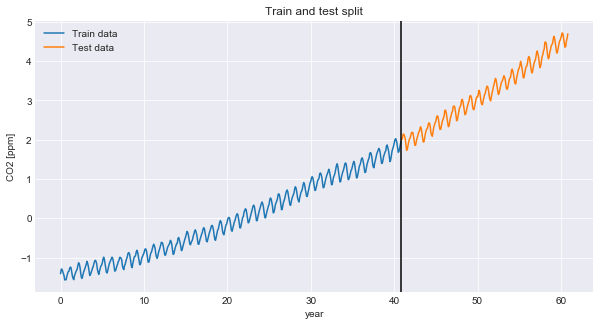

In [8]:
# >>> your code here <<<
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 5))
CO2_train_plt.plot(label='Train data')
CO2_test_plt.plot(label='Test data')
plt.axvline(x=X_train.max(), color='k')
plt.title('Train and test split')
plt.legend(loc='best')
plt.ylabel('CO2 [ppm]')

In [9]:
X_test = X_test.values.reshape(-1, 1)
X_train = X_train.values.reshape(-1, 1)

y_test = CO2_test.reshape(-1, 1)
y_train = CO2_train.reshape(-1, 1)

xlim = [X.min(), X.max()]

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [10]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

In [11]:
#Taken from the seminar
def plot_results(model, X_test, y_test):
    
    print(model)
    
    x = np.concatenate((model.X, X_test))
    
    prediction, variance = model.predict(x)
    std = np.sqrt(variance).ravel()
    prediction = prediction.ravel()
    
    test_pred = model.predict(X_test)[0]
    train_pred = model.predict(model.X)[0]
    
    plt.figure(figsize=(15, 5))
    plt.plot(model.X, model.Y, 'xk', markersize=1., label='Train data')
    plt.plot(X_test, y_test, 'xr', markersize=1., label='Test data')
    plt.plot(model.X, train_pred, label='Prediction Train')
    plt.plot(X_test, test_pred, label='Prediction test')
    plt.fill_between(x.ravel(), prediction - std,
                     prediction + std, alpha=0.3, label='Confidence')
    
    plt.xlabel('year', fontsize=14)
    plt.ylabel('CO2 [ppm]', fontsize=14)
    plt.legend(loc='best')
    plt.title('Prediction on train test split')
    plt.show()
    
    plt.figure(figsize=(15, 5))
    plt.plot(model.Y, train_pred, 'ro', markersize=2., alpha=0.7, label='Train')
    plt.plot(y_test, test_pred, 'bo', markersize=2., alpha=0.7, label='Test')
    plt.plot(prediction, prediction, 'k', label=r'y = x')
    plt.xlabel('True value', fontsize=14)
    plt.ylabel('Predicted value', fontsize=14)
    plt.legend(loc='best')
    plt.title('QQ-plot')
    plt.show()
    
    print('r2_score Train: %0.3f' % r2_score(y_train, train_pred))
    print('r2_score Test: %0.3f' % r2_score(y_test, test_pred))

In [12]:
periodic_kern = StdPeriodic(input_dim=1)
periodic_kern.period.constrain_bounded(1e-2, 1e1)
periodic_kern.lengthscale.constrain_bounded(1e-2, 1e1)

rbf_kern = RBF(input_dim=1)
rbf_kern.lengthscale.constrain_bounded(1e-2, 1e1)

kernel = rbf_kern
kernel += White(1)*rbf_kern
kernel += Poly(1, order=2)
kernel += periodic_kern*periodic_kern * rbf_kern

#kernel = k_trend + k_seasonal + k_noise
#np.random.seed(0)
model = GPRegression(X_train, y_train, kernel)
model.optimize()

reconstraining parameters std_periodic.period
reconstraining parameters std_periodic.lengthscale
reconstraining parameters rbf.lengthscale


In [14]:
X_train.shape

(486, 1)

In [15]:
y_train.shape

(486, 1)


Name : GP regression
Objective : -1188.1190990670898
Number of Parameters : 17
Number of Optimization Parameters : 17
Updates : True
Parameters:
  GP_regression.                        |                  value  |  constraints  |  priors
  sum.rbf.variance                      |  0.0008087980872027444  |      +ve      |        
  sum.rbf.lengthscale                   |     0.5632188000560514  |   0.01,10.0   |        
  sum.mul.white.variance                |  2.611308006115944e-05  |      +ve      |        
  sum.mul.rbf.variance                  |  2.611308006115944e-05  |      +ve      |        
  sum.mul.rbf.lengthscale               |                    1.0  |   0.01,10.0   |        
  sum.poly.variance                     |     0.1656223886771054  |      +ve      |        
  sum.poly.scale                        |   0.002178185628429677  |      +ve      |        
  sum.poly.bias                         |      3.429535497517412  |      +ve      |        
  sum.mul_1.std_periodic.v

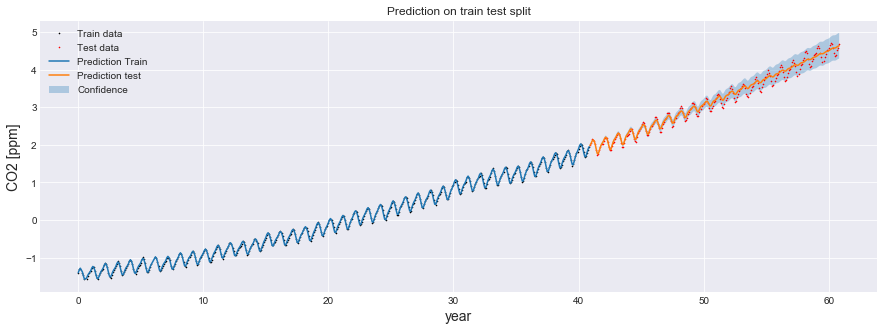

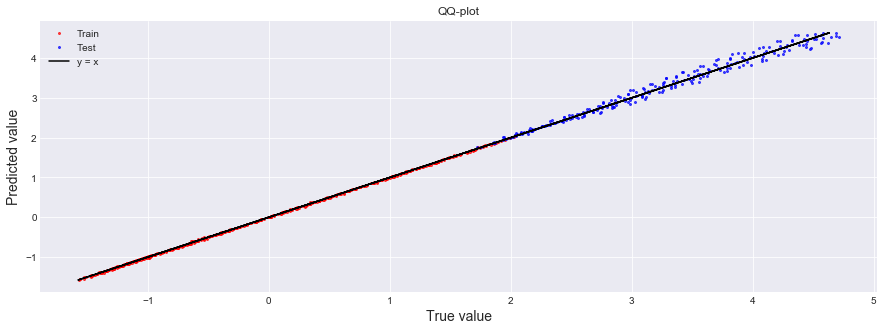

r2_score Train: 1.000
r2_score Test: 0.984


In [13]:
# >>> your code here <<<
plot_results(model, X_test, y_test)